<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
video_id                  37352 non-null object
trending_date             37352 non-null object
title                     37352 non-null object
channel_title             37352 non-null object
category_id               37352 non-null int64
publish_time              37352 non-null object
tags                      37352 non-null object
views                     37352 non-null int64
likes                     37352 non-null int64
dislikes                  37352 non-null int64
comment_count             37352 non-null int64
thumbnail_link            37352 non-null object
comments_disabled         37352 non-null bool
ratings_disabled          37352 non-null bool
video_error_or_removed    37352 non-null bool
description               36791 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 3.8+ MB
IN_videos dataset contains 37352 videos
IN_videos_first dataset contains 16

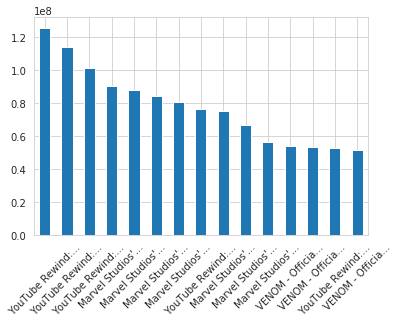

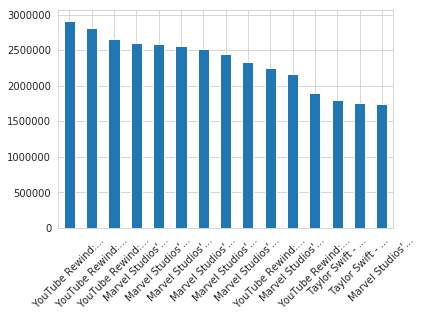

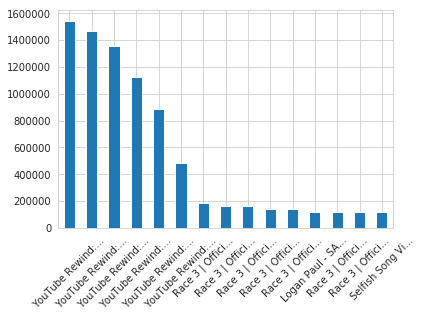

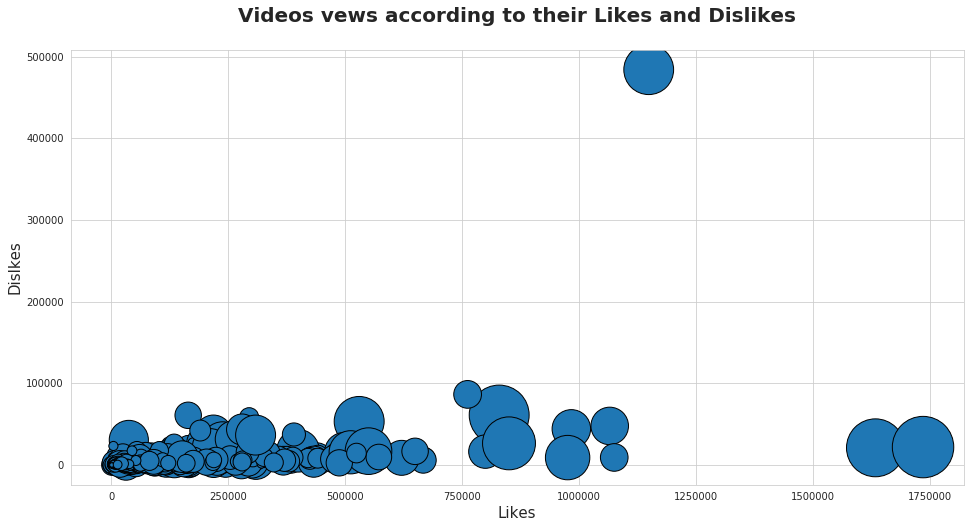

In [0]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Jul 20 12:54:31 2019

@author: nikhilgharge93gmail.com
"""
import io
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.colors as colors


import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

import seaborn as sns

import warnings
from collections import Counter
import datetime
from wordcloud import WordCloud, STOPWORDS
import json



# To interactive buttons
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import warnings
warnings.filterwarnings("ignore")


#Importing the dataset
#The list consist of dataset for only IN videos.
df_youtube = pd.read_csv('INvideos.csv')

#Find all unique values
df_youtube.nunique()

#Check for any missing values
df_youtube.info()

#First we plot the data for an overview 
df_youtube.head()


df_youtube.iloc[4743]

df_youtube['likes_log'] = np.log(df_youtube['likes'] + 1)
df_youtube['views_log'] = np.log(df_youtube['views'] + 1)
df_youtube['dislikes_log'] = np.log(df_youtube['dislikes'] + 1)
df_youtube['comment_log'] = np.log(df_youtube['comment_count'] + 1)

df_youtube_last = df_youtube.drop_duplicates(subset=['video_id'], keep='last', inplace=False)
df_youtube_first = df_youtube.drop_duplicates(subset=['video_id'], keep='first', inplace=False)

print("IN_videos dataset contains {} videos".format(df_youtube.shape[0]))
print("IN_videos_first dataset contains {} videos".format(df_youtube_first.shape[0]))
print("IN_videos_last dataset contains {} videos".format(df_youtube_last.shape[0]))


type_int_list = ['views', 'likes', 'dislikes', 'comment_count']
for column in type_int_list:
    df_youtube[column] = df_youtube[column].astype(int)

type_str_list = ['category_id']
for column in type_str_list:
    df_youtube[column] = df_youtube[column].astype(str)





def visualizeYoutube_contents(my_df, column, num=10):
    sorted_df_youtube = my_df.sort_values(by = column , ascending=False).iloc[:15]
    ax = sorted_df_youtube[column].plot.bar()
    
    
    #Labeling the video titles in bar charts.
    labelsForContents = []
    for item in sorted_df_youtube['title']:
        labelsForContents.append(item[:15]+ '...')
    ax.set_xticklabels(labelsForContents, rotation=45, fontsize=10)  
    plt.show()

    
visualizeYoutube_contents(df_youtube, 'views')   

#Here we reuse the functio to find the most likes.

visualizeYoutube_contents(df_youtube,'likes', num = 7)

#Here we reuse the visualize-most function to find the comment-count

visualizeYoutube_contents(df_youtube, 'dislikes')





plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Videos vews according to their Likes and Dislikes', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Likes', fontsize=15)
plt.ylabel('Dislkes', fontsize=15)

likes = df_youtube_first["likes"].values
dislikes = df_youtube_first["dislikes"].values
views = df_youtube_first["views"].values

plt.scatter(likes, dislikes, s = views/10000, edgecolors='black')
plt.show()




Text(0.5, 1.0, 'Dislike and Comment Counts Scatter Plot')

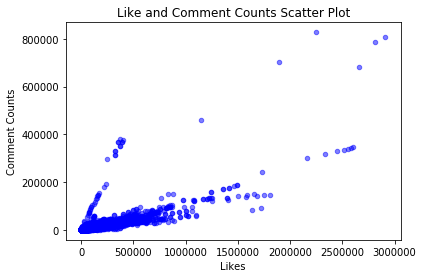

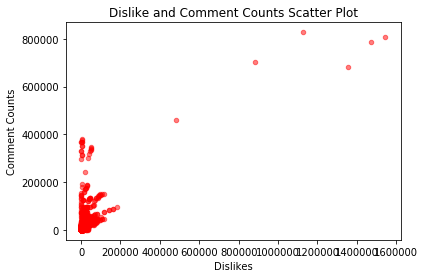

In [0]:


# Scatter Plot 
# x = likes, y = comment counts
df_youtube.plot(kind='scatter', x='likes', y='comment_count',alpha = 0.5,color = 'blue')
plt.xlabel('Likes')              # label = name of label
plt.ylabel('Comment Counts')
plt.title('Like and Comment Counts Scatter Plot')


# Scatter Plot 
# x = dislikes, y = comment counts
df_youtube.plot(kind='scatter', x='dislikes', y='comment_count',alpha = 0.5,color = 'red')
plt.xlabel('Dislikes')              # label = name of label
plt.ylabel('Comment Counts')
plt.title('Dislike and Comment Counts Scatter Plot') 

In [0]:
df_youtube.corr()

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,likes_log,views_log,dislikes_log,comment_log
views,1.000000,0.850096,0.543294,0.674195,-0.034227,-0.034364,0.004976,0.427852,0.575829,0.463550,0.416855
likes,0.850096,1.000000,0.494560,0.780514,-0.045624,-0.040741,0.028464,0.472480,0.500241,0.451609,0.466151
dislikes,0.543294,0.494560,1.000000,0.708125,-0.011821,-0.015136,0.002985,0.160747,0.196467,0.206539,0.168611
comment_count,0.674195,0.780514,0.708125,1.000000,-0.032860,-0.024210,0.015771,0.307226,0.317767,0.306039,0.342461
comments_disabled,-0.034227,-0.045624,-0.011821,-0.032860,1.000000,0.354718,-0.003132,-0.253330,-0.061963,-0.170865,-0.469315
ratings_disabled,-0.034364,-0.040741,-0.015136,-0.024210,0.354718,1.000000,-0.002508,-0.517629,-0.083725,-0.467034,-0.204890
video_error_or_removed,0.004976,0.028464,0.002985,0.015771,-0.003132,-0.002508,1.000000,0.025684,0.017552,0.020835,0.027921
likes_log,0.427852,0.472480,0.160747,0.307226,-0.253330,-0.517629,0.025684,1.000000,0.718663,0.876459,0.817351
views_log,0.575829,0.500241,0.196467,0.317767,-0.061963,-0.083725,0.017552,0.718663,1.000000,0.809442,0.670578
dislikes_log,0.463550,0.451609,0.206539,0.306039,-0.170865,-0.467034,0.020835,0.876459,0.809442,1.000000,0.748567


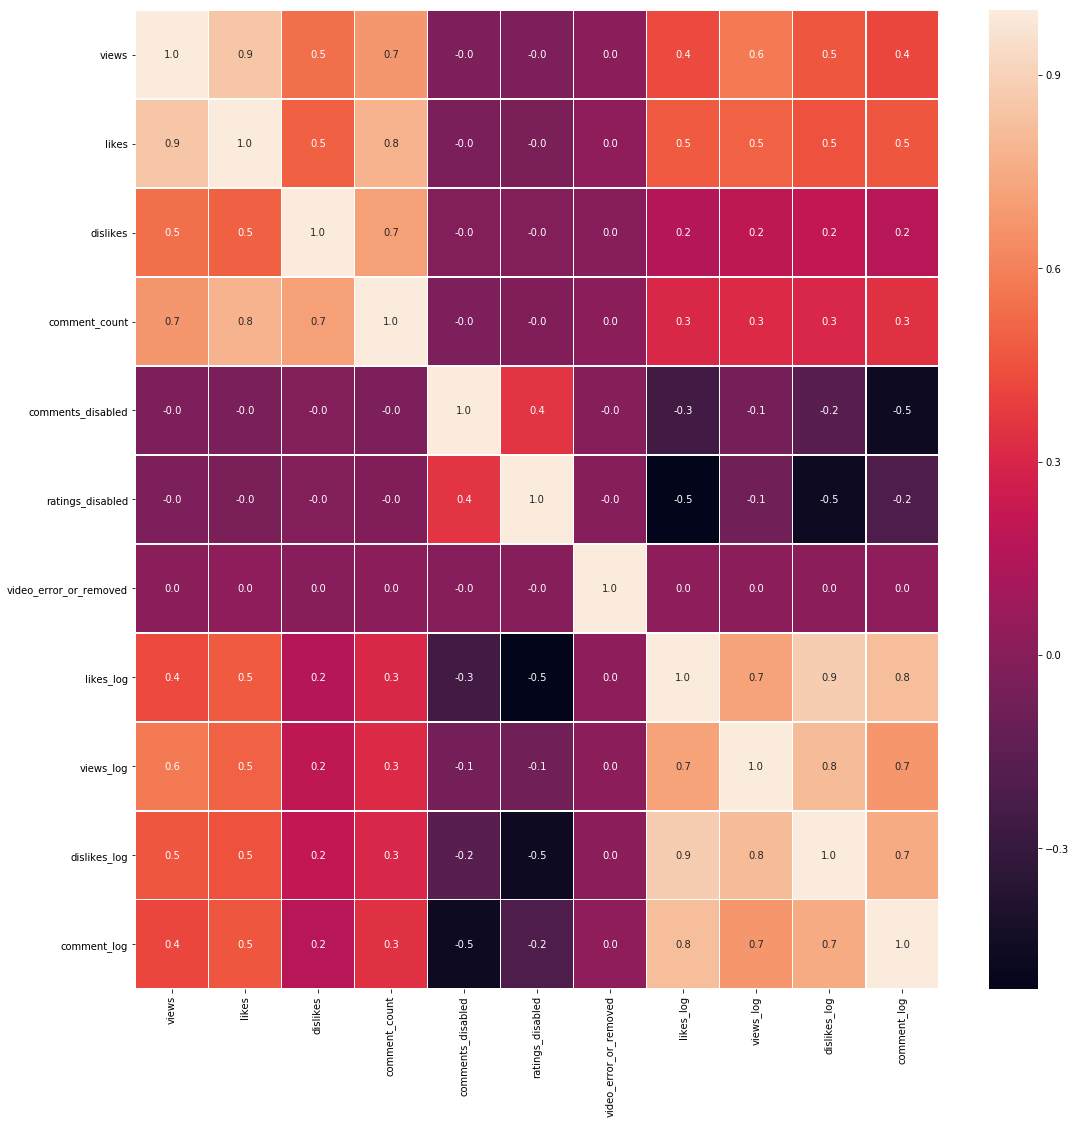

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_youtube.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

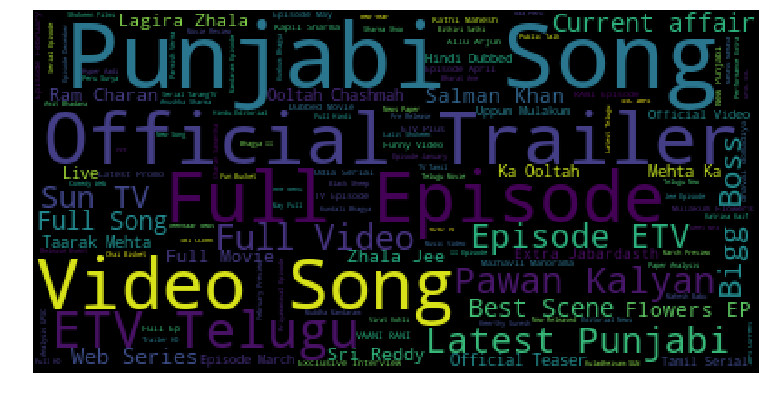

In [0]:
from wordcloud import WordCloud, STOPWORDS
def createwordcloud(data , bgcolor , title):
    plt.figure(figsize = (13,14))
    wc = WordCloud(background_color = bgcolor, max_words = 1000, stopwords = STOPWORDS, max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')
title = df_youtube['title']
createwordcloud(title , 'black' , 'commonly used words in titles' )


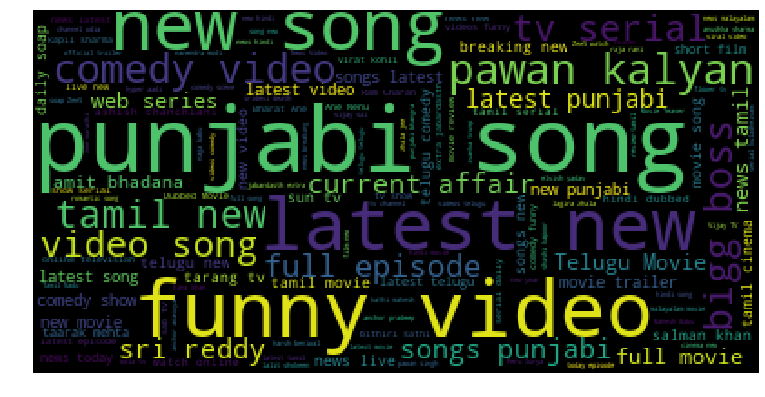

In [0]:
from wordcloud import WordCloud, STOPWORDS
def createwordcloud(data , bgcolor , title):
    plt.figure(figsize = (13,14))
    wc = WordCloud(background_color = bgcolor, max_words = 1000, stopwords = STOPWORDS, max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')
tags = df_youtube['tags']
createwordcloud(tags , 'black' , 'commonly used tags' )

In [0]:
id_to_category = {}

with open('IN_category_id.json' , 'r') as f:
     data = json.load(f)
     for category in data['items']:
         id_to_category [category['id']] = category['snippet']['title']
id_to_category          

{'1': 'Film & Animation',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '2': 'Autos & Vehicles',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [0]:
df_youtube['category'] = df_youtube['category_id'].map(id_to_category)
print(df_youtube['category_id'])
df_youtube.head()

0         1
1        25
2        24
3        23
4        24
5        24
6        10
7        10
8        24
9        24
10       24
11       10
12       25
13       24
14       10
15       22
16       23
17        1
18       23
19       24
20       24
21       22
22       24
23       19
24       24
25       24
26       28
27       25
28        1
29       24
         ..
37322    10
37323    10
37324     1
37325    24
37326    24
37327    24
37328     1
37329    10
37330    23
37331    22
37332    22
37333    23
37334    24
37335    24
37336    23
37337    24
37338    22
37339    24
37340    22
37341    24
37342    25
37343    23
37344    24
37345    43
37346    22
37347    23
37348    24
37349    24
37350    24
37351    24
Name: category_id, Length: 37352, dtype: object


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,likes_log,views_log,dislikes_log,comment_log,category
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,10.433145,13.907477,6.683361,6.783325,Film & Animation
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",6.601230,13.288051,6.807935,0.000000,News & Politics
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,7.606885,13.068939,5.497168,5.010635,Entertainment
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,11.161295,14.032782,7.393263,7.895436,Comedy
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,6.200509,13.047674,5.683580,4.204693,Entertainment


{'kind': 'youtube#videoCategory', 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/x5NxSf5fz8hn4loSN4rvhwzD_pY"', 'id': '44', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Trailers', 'assignable': False}}
Index(['Entertainment', 'News & Politics', 'Music', 'Comedy', 'People & Blogs',
       'Film & Animation', 'Education', 'Howto & Style', 'Sports',
       'Science & Technology', 'Shows', 'Autos & Vehicles', 'Gaming', 'Movies',
       'Travel & Events', 'Pets & Animals'],
      dtype='object')
[16712  5241  3858  3429  2624  1658  1227   845   731   552   205    72
    66    16     8     3]


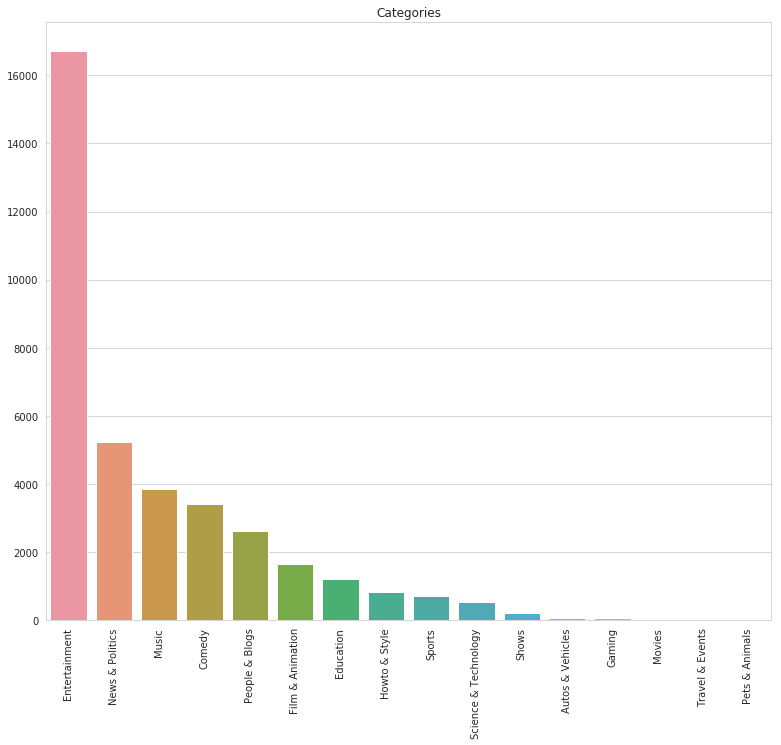

In [0]:
def view_CategoricalData(x , y, title):
  plt.figure(figsize = (13,11))
  sns.barplot(x = x , y = y)
  plt.title(title)
  plt.xticks(rotation = 90)
  plt.show()

print(category)
x = df_youtube.category.value_counts().index
y = df_youtube.category.value_counts().values
print(x)
print(y)
title = "Categories"
view_CategoricalData(x,y,title)